# Objectives
- NLP (Natural Language Processing) - It is important for most cases
- TextBlob, NLTK(Natural Language Tool Kit), textatistic and spaCy
- Tokenization of tex into words and sentences
- Parts of speech tagging
- Sentiment analysis - positive, negative and neutral
- Detect language of text and how to translate between languages
- Word roots - stemming and lemmatization
- Spell checking and correction
- Removing stop words from the text
- Word visualization         
- Readability assessment
- Name entity recognition and similarity detection

# Examples of NL communications
- Conversations between two people
- Learning a foreign language
- Use of smartphone to read a menu
- Reading/writing text messages
- Blind - braille or listening to the screen reader
- Email - Spanish - English

# Text collections - corpora or plural corpus
- Tweets - tweepy to harvest data from twitter using Python
- Facebook posts
- Conversations
- Movie reviews
- Documents
- Books 
- News

*** Nuisance of meaning makes NL learning difficult
-- because the meaning can influenced by context and reader's view of the world

# TextBlob : Simplified Text Processing
- It is an object-oriented NLP text processing and built on the NLTK and pattern NLP libraries
- Jobs:
    - Tokenization - splitting text into pieces of tokens - words or numbers
    - Parts-of-speech (POS) tagging - noun, verb, adjective
    - Noun-phrase extraction - `red brick factory`
        - Is a red brick factory:
            -- a factory that makes red bricks
            -- a factory that makes bricks of any color
            -- a factory built of red bricks that makes products of any type
        - Music group- pop
    - Sentiment analysis
    - Inter-language translations and detecting the language - Google Translate
    - Inflection - pluralizing or singularizing words
    - Spell checking and spell correction
    - Stemming - varieties 
    - Lemmatization - varieties become variety - generate real words based on word's context
    - WordNet integration
    - Word frequencies
    - Stop-word elimination eg as, a, an, the, I, we  -don't bring out the theme of the topic or conversation
    - n-grams - producing sets of consecutive words in a corpus for use in identifying words that frequently appear adjacent to one other

# Project Gutenberg
- Rich source for text for analysis - free e-books

In [1]:
from textblob import TextBlob

In [2]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather'

In [3]:
blob=TextBlob(text) # Sentence(s) word(s) inherited from BaseBlob

In [4]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather")

In [5]:
# TextBlob does supports various methods and comparisons - Sentences, words

In [6]:
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather")]

In [7]:
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

In [8]:
blob.word_counts

defaultdict(int,
            {'today': 1,
             'is': 1,
             'a': 1,
             'beautiful': 1,
             'day': 1,
             'tomorrow': 1,
             'looks': 1,
             'like': 1,
             'bad': 1,
             'weather': 1})

# Parts of Speech
- Evaluate words based on context - determin POS - determine the meaning
- Nouns, pronouns, verbs, adjectives, adverbs, prepositions, conjunctions and interjections (Ha! Yes!)
- sub- categories - 
- meanings of words - `set` and `run` 


In [9]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather")

In [10]:
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

- TetBlob - patternTagger 63 parts of speech tags
- NN - singular noun or mass noun
- VBZ - thrid person singular present verb
- DT - determiner - (the, an, that, my, this, their)
- JJ - adjective
- NNP - proper singular noun
- IN - subordinating conjunction or preposition

# Extracting Noun Phrases

In [11]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather")

In [12]:
blob.noun_phrases

WordList(['beautiful day', 'tomorrow', 'bad weather'])

# Sentiment Analysis with the TextBlob Default Sentiment Analyzer
- Positive, Negative, Neutral - categories for sentiments
- Eg the food is not good (-ve), the movie was not bad (+ve but not as +ve), the movie was excellent (+ve)
- Deep learning

In [13]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather")

In [14]:
blob.sentiment

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

- Polarity ranges from -1(-ve), 1.0(+ve), 0.0(neutral)
- Subjectivity 
    - 0.0 - very objective
    - 1.0 - very subjective

In [15]:
text2 = "Vote! Vote! Vote!"
blob2 = TextBlob(text2)

In [16]:
blob2

TextBlob("Vote! Vote! Vote!")

In [17]:
blob2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [18]:
text3 = "I will be making a statement tonight. A Big WIN!"
blob3 = TextBlob(text3)

In [19]:
blob3

TextBlob("I will be making a statement tonight. A Big WIN!")

In [20]:
blob3.sentiment

Sentiment(polarity=0.5, subjectivity=0.25)

In [21]:
%precision 3  
# default precision for standalone float object - lists, tuples, dict

'%.3f'

In [22]:
blob.sentiment.polarity

0.075

In [23]:
blob.sentiment.subjectivity

0.833

In [24]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather")

In [25]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


# Sentiment Analysis with the NaiveBayesAnalyzer

In [26]:
from textblob.sentiments import NaiveBayesAnalyzer

In [27]:
text

'Today is a beautiful day. Tomorrow looks like bad weather'

In [28]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())

In [29]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather")

In [30]:
blob.sentiment

Sentiment(classification='neg', p_pos=0.47662917962091056, p_neg=0.5233708203790892)

In [31]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(classification='pos', p_pos=0.8117563121751951, p_neg=0.18824368782480477)
Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


# Language Detection and Translation
- Near real-time translation
- IBM Watson - inter-language translation

In [32]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather")

In [33]:
blob.detect_language()

'en'

In [34]:
spanish = blob.translate(to='es')

In [35]:
spanish

TextBlob("Hoy es un hermoso dia. Mañana parece mal tiempo")

In [36]:
chinese = blob.translate(to='zh')

In [37]:
chinese

TextBlob("今天是美好的一天。明天看起来天气不好")

In [38]:
swahili = blob.translate(to='sw')

In [39]:
swahili

TextBlob("Leo ni siku nzuri. Kesho inaonekana kama hali mbaya ya hewa")

# Inflection: Pluralization and Singularization
- Inflections are different forms of the same words, such as singular and plural eg person-people, and different verb tenses eg run-ran
- Word frequencies - want to convert all inflected words to the same form -- accurate word freq

In [40]:
from textblob import Word

In [41]:
index = Word('index')

In [42]:
index

'index'

In [43]:
index.pluralize()

'indices'

In [44]:
cacti = Word('cacti')

In [45]:
cacti

'cacti'

In [46]:
cacti.singularize()

'cactus'

NB: Pluralizing cactus gives cactuss

In [47]:
from textblob import TextBlob

In [48]:
animals = TextBlob('dog cat fish bird').words

In [49]:
animals

WordList(['dog', 'cat', 'fish', 'bird'])

In [50]:
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

# Harvesting Data from Twitter
- Tweepy > 3.7
- geopy

In [51]:
import tweepy 
# this is the gateway to using Twitter APIS. 
# You must authenticate with Twitter to be able to use it 

In [52]:
import keys

- We need to create and configure an OAuthHandler to Authenticate with Twitter

In [53]:
auth = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)

In [54]:
auth.set_access_token(keys.access_token, keys.access_token_secret)

- We must take note of two methods:
    - 'wait_on_rate_limit=True' -- tweepy waits for 15 mins, gets to the limit to avoid violations of Twitter rules
    - 'wait_on_rate_limit_notify=True' -- tweepy displays a command line message when you hit the rate limit 

In [55]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Getting information about a Twitter Account

In [56]:
trump = api.get_user('realDonaldTrump')

In [57]:
nasa = api.get_user('nasa')

In [58]:
trump.id

25073877

In [59]:
nasa.id

11348282

In [60]:
trump.name

'Donald J. Trump'

In [61]:
nasa.name

'NASA'

In [62]:
trump.description

'45th President of the United States of America🇺🇸'

In [63]:
nasa.description

'🚀 Exploring the universe and our home planet.'

In [64]:
trump.status.text

'RT @realDonaldTrump: https://t.co/AMIT0WetT1'

In [65]:
nasa.status.text

'RT @NASAKennedy: Launch Update 🚀 @NASA and @SpaceX are now targeting Sunday, Dec. 6 at 11:17 a.m. ET for the 21st Commercial Resupply Servi…'

In [66]:
nasa.followers_count

42316939

In [67]:
trump.followers_count

88745171

In [68]:
obama = api.get_user('barackobama')

In [69]:
obama.name

'Barack Obama'

In [70]:
obama.status.text

'Thanks for sharing Marjon. I hope you get something out of A Promised Land – keep up the good work! https://t.co/61xocjGFB5'

In [71]:
obama.followers_count

126926633

In [72]:
obama.friends_count

598236

In [73]:
me = api.me()

In [74]:
me.name

'Shreya Panchal'

In [75]:
me.friends_count

0

In [76]:
me.followers_count

0

# Spellchecking and Correction

- Free of spelling errors
- Word's spellcheck method - list of tuples - correct spellings - confidence values
- eg theyr for they

In [77]:
from textblob import Word

In [78]:
word = Word('theyr')

In [79]:
word.spellcheck()

[('they', 0.571), ('their', 0.429)]

In [80]:
word.correct()

'they'

In [81]:
from textblob import TextBlob

In [82]:
sentence = TextBlob('Ths sntnc ha mspled wrds')

In [83]:
sentence.correct()

TextBlob("The sntnc ha smiled words")

# Normalization: Stemming and Lemmatization
- Stemming - prefix and suffix - remove - stem - not a real world meaning
- Lemmatization - same -- result - real world meaning
- Normalization - program, programs, programming

In [84]:
from textblob import Word

In [85]:
word = Word('varieties')

In [86]:
word.stem()

'varieti'

In [87]:
word.lemmatize()

'variety'

# Word Frequencies
- For similarity between word documents, we use word frequencies
- TextBlob can count the word frequency for you
- Path's read_text() reads closes


In [88]:
from pathlib import Path

In [89]:
from textblob import TextBlob 

In [90]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

In [91]:
blob.word_counts['Juliet'] # sensitive to capitalization

0

In [92]:
blob.words.count('Juliet') # insensitive to capitalization

177

In [93]:
blob.noun_phrases.count('lady capulet')

46

# Getting Definitions, Synonyms and Antonyms from WordNet
- Using the WordNet, an English word database from which you can get definitions, synonyms and antonyms

In [94]:
from textblob import Word

In [95]:
happy = Word('happy')

In [96]:
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [97]:
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

- Synset is a group of synonyms
- Word's lemmatized form
- a-adjective ; n-noun ; v-verb ; r-adverb ; s-adjective satellite

In [98]:
synonyms = set()

In [99]:
for synset in happy.synsets:
    for lemma in synset.lemmas():
        synonyms.add(lemma.name())

In [100]:
synonyms

{'felicitous', 'glad', 'happy', 'well-chosen'}

In [101]:
lemmas = happy.synsets[0].lemmas()

In [102]:
lemmas

[Lemma('happy.a.01.happy')]

In [103]:
lemmas[0].antonyms()

[Lemma('unhappy.a.01.unhappy')]

# Stop Words
- Words without much meaning in a statement
- Common words that are often removed before analysis which don't provide useful information 
- nltk - stop words

In [104]:
import nltk

In [105]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
from nltk.corpus import stopwords

In [107]:
stops = stopwords.words('english')

In [108]:
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [109]:
stopsFrench = stopwords.words('french')

In [110]:
stopsFrench

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [111]:
from textblob import TextBlob

In [112]:
blob = TextBlob('Today is a beautiful day.')

In [113]:
[word for word in blob.words if word not in stops]

['Today', 'beautiful', 'day']

# n-grams
- A sequence of n text items which could be letters in words or words in sentences
- It is used to identify letters or words that appear frequently
- Uses include:
    - Predictive text input
    - Speech-to-text conversions
    - 

In [114]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [115]:
blob = TextBlob(text)

In [116]:
# ngrams() n=4 n=6 default is 3

In [117]:
blob.ngrams(n=2)

[WordList(['Today', 'is']),
 WordList(['is', 'a']),
 WordList(['a', 'beautiful']),
 WordList(['beautiful', 'day']),
 WordList(['day', 'Tomorrow']),
 WordList(['Tomorrow', 'looks']),
 WordList(['looks', 'like']),
 WordList(['like', 'bad']),
 WordList(['bad', 'weather'])]

# Visualizing Word Frequencies with Bar Chart and Word Clouds

- top 20 words - remove the stopwords

In [118]:
%matplotlib inline

In [119]:
#load the data
from pathlib import Path

In [120]:
from textblob import TextBlob

In [121]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

In [122]:
from nltk.corpus import stopwords

In [123]:
# getting the frequencies of the words

In [124]:
items = blob.word_counts.items()

In [125]:
stop_words = stopwords.words('english')

In [126]:
# eliminate stop words
items =[item for item in items if item[0] not in stop_words]

In [127]:
items

[('ï', 1),
 ('»', 1),
 ('¿', 1),
 ('contents', 1),
 ('prologue', 3),
 ('act', 13),
 ('scene', 51),
 ('public', 5),
 ('place', 16),
 ('ii', 12),
 ('street', 10),
 ('iii', 12),
 ('room', 8),
 ('capuletâ€™s', 22),
 ('house', 32),
 ('iv', 10),
 ('v', 10),
 ('hall', 8),
 ('chorus', 6),
 ('open', 9),
 ('adjoining', 2),
 ('garden', 8),
 ('friar', 104),
 ('lawrenceâ€™s', 10),
 ('cell', 22),
 ('vi', 2),
 ('gallery', 2),
 ('julietâ€™s', 11),
 ('chamber', 13),
 ('overlooking', 2),
 ('juliet', 177),
 ('bed', 25),
 ('mantua', 15),
 ('churchyard', 9),
 ('monument', 11),
 ('belonging', 3),
 ('capulets', 8),
 ('dramatis', 1),
 ('personã¦', 1),
 ('escalus', 2),
 ('prince', 37),
 ('verona', 13),
 ('mercutio', 83),
 ('kinsman', 12),
 ('friend', 15),
 ('romeo', 298),
 ('paris', 58),
 ('young', 24),
 ('nobleman', 2),
 ('page', 12),
 ('montague', 45),
 ('head', 16),
 ('veronese', 2),
 ('family', 2),
 ('feud', 2),
 ('lady', 109),
 ('wife', 20),
 ('son', 17),
 ('benvolio', 79),
 ('nephew', 3),
 ('abram', 7),


# Sorting the Words Frequency
- Sorting in descending order
- To specify the tuple element we use the item getter function - operator module

In [128]:
from operator import itemgetter

In [129]:
sorted_items=sorted(items, key=itemgetter(1), reverse=True)

In [130]:
sorted_items[len(sorted_items)-1]

('punished', 1)

In [131]:
len(sorted_items)

3704

In [132]:
top20=sorted_items[:21]

In [133]:
sorted_items[0]

('romeo', 298)

In [134]:
type(sorted_items)

list

In [135]:
sorted_items

[('romeo', 298),
 ('thou', 277),
 ('juliet', 177),
 ('thy', 170),
 ('nurse', 149),
 ('capulet', 141),
 ('thee', 138),
 ('love', 137),
 ('shall', 110),
 ('lady', 109),
 ('friar', 104),
 ('come', 94),
 ('mercutio', 83),
 ('good', 81),
 ('benvolio', 79),
 ('enter', 75),
 ('go', 75),
 ('iâ€™ll', 71),
 ('tybalt', 70),
 ('death', 69),
 ('night', 68),
 ('lawrence', 67),
 ('man', 66),
 ('”', 65),
 ('hath', 64),
 ('one', 60),
 ('paris', 58),
 ('well', 58),
 ('sir', 57),
 ('art', 55),
 ('would', 54),
 ('say', 52),
 ('scene', 51),
 ('may', 48),
 ('dead', 48),
 ('doth', 47),
 ('give', 47),
 ('yet', 47),
 ('montague', 45),
 ('day', 45),
 ('fair', 44),
 ('let', 44),
 ('tell', 44),
 ('upon', 42),
 ('take', 40),
 ('â€™tis', 40),
 ('must', 40),
 ('â€', 40),
 ('make', 40),
 ('like', 38),
 ('prince', 37),
 ('much', 37),
 ('see', 36),
 ('know', 35),
 ('first', 34),
 ('sweet', 34),
 ('exeunt', 33),
 ('gone', 33),
 ('house', 32),
 ('exit', 32),
 ('time', 32),
 ('servant', 31),
 ('look', 31),
 ('ay', 30),
 (

In [136]:
#convert to dataframe

import pandas as pd

In [137]:
df=pd.DataFrame(top20, columns=['words','count'])

In [138]:
df

,words,count
0,romeo,298
1,thou,277
2,juliet,177
3,thy,170
4,nurse,149
5,capulet,141
6,thee,138
7,love,137
8,shall,110
9,lady,109


In [139]:
import matplotlib.pyplot as plt

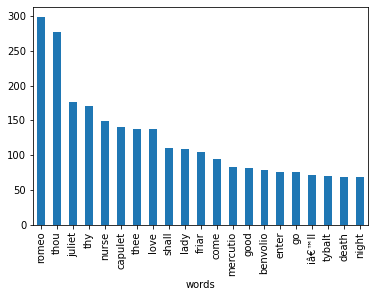

In [140]:
axes = df.plot.bar(x='words', y='count', legend=False)

assignment 3 - go to project gutenberg, pick 2 books, do an analysis, bar plot of the top 20 words, eg constituions of two different countries, due week 1 maybe wednesday class

# Visualizing Word Frequencies with Word Clouds
- Open source wordcloud module - WordCloud
- Matplotlib for plotting 


In [141]:
# conda install -c conda-forge wordcloud

# Loading of the Text

In [142]:
from pathlib import Path

In [143]:
text = Path('RomeoAndJuliet.txt').read_text()

In [144]:
text

'ï»¿\n\n\n\n\n\n\n\n\n\nContents\n\nTHE PROLOGUE.\n\nACT I\nScene I. A public place.\nScene II. A Street.\nScene III. Room in Capuletâ€™s House.\nScene IV. A Street.\nScene V. A Hall in Capuletâ€™s House.\n\n\nACT II\nCHORUS.\nScene I. An open place adjoining Capuletâ€™s Garden.\nScene II. Capuletâ€™s Garden.\nScene III. Friar Lawrenceâ€™s Cell.\nScene IV. A Street.\nScene V. Capuletâ€™s Garden.\nScene VI. Friar Lawrenceâ€™s Cell.\n\n\nACT III\nScene I. A public Place.\nScene II. A Room in Capuletâ€™s House.\nScene III. Friar Lawrenceâ€™s cell.\nScene IV. A Room in Capuletâ€™s House.\nScene V. An open Gallery to Julietâ€™s Chamber, overlooking the Garden.\n\n\nACT IV\nScene I. Friar Lawrenceâ€™s Cell.\nScene II. Hall in Capuletâ€™s House.\nScene III. Julietâ€™s Chamber.\nScene IV. Hall in Capuletâ€™s House.\nScene V. Julietâ€™s Chamber; Juliet on the bed.\n\n\nACT V\nScene I. Mantua. A Street.\nScene II. Friar Lawrenceâ€™s Cell.\nScene III. A churchyard; in it a Monument belonging to t

- We load the mask image that specifies the word cloud's shape
- The WordCloud fills non-white areas of a mask image with the text
- We load the mask image using the imread function from the imageio module found in Anaconda

In [145]:
import imageio 

In [146]:
mask_image = imageio.imread('mask_heart.jpg')

# Configuring the WordCloud object
- 400 pixels by 200 pixels - default image size
- Color used is assigned randomly from the color map by Matplotlib

In [147]:
from wordcloud import WordCloud

In [148]:
wordcloud = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, background_color='white')

- WordCloud has a method called generate() which receives the text to use in the word cloud as an argument and creates the world cloud

In [149]:
wordcloud = wordcloud.generate(text)

- Removes the stop words from the text argument using the in-built stopwords list
- Calculates the word frequencies for the remaining words
- Builds the cloud with maximum 200 by default - max_words

In [150]:
# saving the image

wordcloud = wordcloud.to_file('RomeoAndJulietHeart.jpg')

# Generating a word cloud from a dict
- If you have a WordCloud's fit_words method to create a word cloud from it
- It does not remove the stop words from the dict

In [151]:
%matplotlib inline

In [152]:
import matplotlib.pyplot as plt

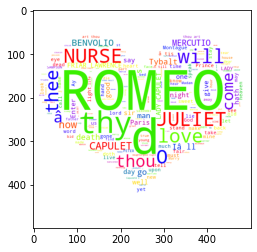

In [153]:
plt.imshow(wordcloud)

# WordCloud on Twitter

In [154]:
import tweepy

In [155]:
import keys

In [156]:
auth = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)

In [157]:
auth.set_access_token(keys.access_token, keys.access_token_secret)

In [158]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [159]:
nasa = api.get_user('nasa')

In [160]:
nasa.status.text

'RT @NASAKennedy: Launch Update 🚀 @NASA and @SpaceX are now targeting Sunday, Dec. 6 at 11:17 a.m. ET for the 21st Commercial Resupply Servi…'

In [161]:
nasa.followers_count

42316954

In [162]:
nasa.friends_count

209

# Tweepy `Cursors`: Getting an Account Followers and Friends
- Twitter API methods often will return a collection of objects:
    - Tweets in your Twitter timelines
    - Another account timeline
    - Timelines for tweets sent by a user and by the user's friends
- Max items to be returned - page of results
- JSON - more pages to get - Cursor handles the paging issue
- Invokes a method and checks if there is another page of results
- API object is configured to wait on rate limits

# Determining an Account's Followers
- Followers method call Twitter's followers/list method - 20 by default up to 200
- Grab 10 followers of NASA

In [163]:
# create a cursor

followers=[]

In [164]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa')

In [165]:
cursor

In [166]:
for account in cursor.items(20):
    followers.append(account.screen_name)

In [167]:
print('Followers: ', ' '.join(sorted(followers, key=lambda s: s.lower())))

Followers:  Black79419513 CalasHector CTrikka DaveSav88827610 DeepakM87179961 DeniSupandi13 DerekDuvall15 GaboYaez3 GaurMehull GrafVrinda kdVB4eNHs64VnZZ kvcsadrnnnkltt leonavsot Mandeep05330340 NurMoha87999354 Nusayba81823830 pritpal31095802 Ria99656114 Sachinj96478975 Tatiana00663495


We can only get information about a few followers cause of the rate limit. 

# Automatic Paging
- To get upto 200 followers at a time, create the cursor with the `count` keyword argument
- The below takes some time

In [168]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa', count=200)

# Determining whom an Account follows
- The API `friends` method: 
    - calls the Twitter's friends/list method
    - user objects
- 20 by default - 200 at a time
- 15 times every 15 minutes

In [169]:
friends = []

In [170]:
cursor = tweepy.Cursor(api.friends, screen_name='nasa')

In [171]:
for friend in cursor.items(10):
    friends.append(friend.screen_name)

In [172]:
print('Friends: ', ' '.join(sorted(friends, key=lambda s: s.lower())))

Friends:  Astro_Megan Astro_SEAL dominickmatthew DoNASAScience KathyLueders MarkKirasich NASA_Marshall NASAPersevere NASARoman uaespaceagency


# Getting a User's recent Recent Tweets
- API object `user_timeline` gets tweets from an account and account's friends
- it calls the status/user_timeline method
- It returns up to 20 tweets as Status object - 200
- 3200 most recent tweets
- 1500 times every 15 minutes

In [173]:
nasa_tweets = api.user_timeline(screen_name='nasa', count=3)

In [174]:
for tweet in nasa_tweets:
    print(f'{tweet.user.screen_name}: {tweet.text}\n')

NASA: RT @NASAKennedy: Launch Update 🚀 @NASA and @SpaceX are now targeting Sunday, Dec. 6 at 11:17 a.m. ET for the 21st Commercial Resupply Servi…

NASA: 🚀 The @SpaceX resupply mission launching Sat., Dec. 5 will make history for many firsts, including the first time 2… https://t.co/V7aoqiUzqs

NASA: Project Scientist Bob Pappalardo of @NASAJPL discusses our upcoming @EuropaClipper mission as well as the possibili… https://t.co/f4f1T57vjh



In [175]:
api.home_timeline()

[]

# Searching Recent Tweets
- Via API method `search` - it matches query string
- Returns previous 7 days tweets
- Doesn't guarantee return all matching tweets
- Returns 15 tweets at a time by default and go upto 100

In [176]:
from textblob import TextBlob

In [177]:
def print_tweets(tweets):
    """For each Tweepy Status object in tweets, display the user's screen_name and tweet text.
    If the language is not English, translate text with TextBlob."""
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
        if 'en' in tweet.lang:
            print(f'{tweet.text}\n')
        elif 'und' not in tweet.lang:
            print(f'\n ORIGINAL: {tweet.text}')
            print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')

In [178]:
tweets = api.search(q='Mars Rover', count=6)

In [179]:
print_tweets(tweets)

JorgePlaGarcia: 
 ORIGINAL: RT @anajuliabanlei: El pequeño rover Sojourner descendió de la Mars Pathfinder, renombrada Carl Sagan Memorial Station, en honor del astrón…
TRANSLATED: RT @anajuliabanlei: The small rover Sojourner descended from the Mars Pathfinder, renamed Carl Sagan Memorial Station, in honor of the astronomer ...

amboy00: RT @oldmanebro: He is an engineer.
He invented the hydraulic resonance suppressor tube on Boeing 747 airplanes .... and developed sundials…

Ikkeebattle: Mars rover.  Did not know it was this big. #space #marsrover #spacex https://t.co/xtwpzDeYWx

RDJnotRobDownJr: @Bret_Sears He invented the hydraulic resonance suppressor tube on Boeing 747 airplanes and developed sundials for… https://t.co/lVyeOMW8e3

marsboy: Curiosity Mars Rover: Marching Forward

https://t.co/bXNG5EwzW3 https://t.co/xbUmsZizZH

TooAuthentic: RT @oldmanebro: He is an engineer.
He invented the hydraulic resonance suppressor tube on Boeing 747 airplanes .... and developed sundials…



In [180]:
tweets = api.search(q='die mannschaft', count=10)

In [181]:
print_tweets(tweets)

HSV: 
 ORIGINAL: 🎙 | 2️⃣ Weiter führt der Coach aus: „Es tut mir sehr leid für die Mannschaft, dass sie sich nicht mit dem Ausgleich… https://t.co/bY1yQ8kbqU
TRANSLATED: 🎙 | 2️⃣ The coach continues: “I am very sorry for the team that they did not come to terms with the equalization… https://t.co/bY1yQ8kbqU

Saboruffy11: 
 ORIGINAL: @Jan1900FCB @Mo_1893 @GamerBr0ski kommt auf auslosung an. z.b. tottenham war nie die 2. beste mannschaft in europa.… https://t.co/YTqaAQUL8I
TRANSLATED: @ Jan1900FCB @ Mo_1893 @ GamerBr0ski depends on the draw. e.g. tottenham was never the 2nd best team in europe.… https://t.co/YTqaAQUL8I

OnkelFester93: 
 ORIGINAL: Selten hat mir ein 0:0 die Pulsader dermaßen anschwillen lassen. Egal ob es die eigene Mannschaft war, der Schiedsr… https://t.co/cyNI6XTMI5
TRANSLATED: Seldom has a 0-0 draw swollen my wrists so much. Regardless of whether it was your own team, the referee ... https://t.co/cyNI6XTMI5

Senfrock: 
 ORIGINAL: Ich verstehe Dortmunds „Pressing-Konzep

In [182]:
tweets_specific_search=api.search(q='from:nasa since:2020-11-13', count =15)

In [183]:
print_tweets(tweets_specific_search)

NASA: RT @NASAKennedy: Launch Update 🚀 @NASA and @SpaceX are now targeting Sunday, Dec. 6 at 11:17 a.m. ET for the 21st Commercial Resupply Servi…

NASA: 🚀 The @SpaceX resupply mission launching Sat., Dec. 5 will make history for many firsts, including the first time 2… https://t.co/V7aoqiUzqs

NASA: Project Scientist Bob Pappalardo of @NASAJPL discusses our upcoming @EuropaClipper mission as well as the possibili… https://t.co/f4f1T57vjh

NASA: What investigations &amp; science activities will be part of #Artemis III, which will land @NASA_Astronauts on the luna… https://t.co/vjcwA4vl8u

NASA: ☁️ Weather is 50% GO for launch tomorrow. 

Melody Lovin, launch weather officer for the @45thSpaceWing describes i… https://t.co/y9qDzGf2L9

NASA: 🛰️ Stays on @Space_Station for 75 days 
🧪Double the amount of powered cargo (good for life sciences) 
✔️Certified f… https://t.co/pRwrMf61fO

NASA: ❓ Fun fact: If the weather holds on Saturday, this will be the third year in a row that @SpaceX launch

# Searching for Hashtags (#)
- Hashtags indicated by `#` indicates an important or trending topic

In [184]:
tweet_hashtag=api.search(q = '#mpigs', count=5)

In [185]:
print_tweets(tweet_hashtag)

itsWanzalaPeter: RT @comradefyat: See beyond your imagination with  good Hi-Tech Screen TV DM @merakielec_ke for price and more info. Call/ WhatsApp 0768855…

Allkeyan: 
 ORIGINAL: Na hii njaa yote, kwani Kenya tumefika mahali ya kulipa 640 #mpigs  na #senators #EpukaBBI
TRANSLATED: And all this hunger, as in Kenya we have come to the point of paying 640 #mpigs and #senators #EpukaBBI

nathanrobe: @robinnjogu @TreasuryKe @BaloziYatani one day, I hope those #MPigs will come out and confess of their misdeeds like… https://t.co/PVd4b3xAzU

xyzshow: RT @EvelyneWambui: XYZ, am I seeing pigs?..... #Mpigs... Help ourselves LOL!  Good one @ntvkenya @xyzshow

EvelyneWambui: XYZ, am I seeing pigs?..... #Mpigs... Help ourselves LOL!  Good one @ntvkenya @xyzshow



# Spotting Trends with Twitter Trends API
- Issues that go viral
- Maintains a list of trending topics worldwide
- Twitter Trends API returns a list of trending topic loctions and the top 50 trending topics

In [186]:
# Places with Trending Topics

In [187]:
trends_available = api.trends_available()

In [188]:
len(trends_available)

467

In [189]:
trends_available[32]

{'name': 'Swansea',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/36758',
 'parentid': 23424975,
 'country': 'United Kingdom',
 'woeid': 36758,
 'countryCode': 'GB'}

In [190]:
# Getting a list of trending topics

In [191]:
world_trends = api.trends_place(id=1)

In [192]:
trends_list = world_trends[0] ['trends']

In [193]:
trends_list[0]

{'name': '#BTSxMMA',
 'url': 'http://twitter.com/search?q=%23BTSxMMA',
 'promoted_content': None,
 'query': '%23BTSxMMA',
 'tweet_volume': 332838}

# Getting today's worldwide Trending Topics
- For trends with more than 10,000 tweets, the tweet_volume is the number of tweets;  otherwise it's none
- Filter the list so that it contains only trends with more than 10,000 tweets

In [194]:
trends_list = [t for t in trends_list if t['tweet_volume']]

In [195]:
# sort the trends in descending order by use of tweet_volume

In [196]:
from operator import itemgetter

In [197]:
trends_list.sort(key=itemgetter('tweet_volume'), reverse=True)

In [198]:
for trend in trends_list[:10]:
    print(trend['name'])

#MMA2020
artist of the year
Black Swan
song of the year
#JIMIM
#BTSxMMA
Bangtan
hoseok
jikook
#nhkらじらー


# Trending Topics (WOEID=23424863)

In [199]:
kenya_trends = api.trends_place(id=23424863) # Kenya WOEID

In [200]:
kenya_list = kenya_trends[0] ['trends']

In [201]:
kenya_list = [t for t in kenya_list if t['tweet_volume']]

In [202]:
kenya_list.sort(key=itemgetter('tweet_volume'), reverse=True)

In [203]:
for trend in kenya_list[:10]:
    print(trend['name'])

Google
King
Paper
Study
Premium
Israel
Chelsea
Liverpool
Messi
Arsenal


# Create a WordCloud for Trending Topics
- Visualize Kenya's trending topics with more than 10,000 tweets each

In [204]:
topics = {} # dict to store trend names and volume

In [205]:
for trend in kenya_list:
    topics[trend['name']] = trend['tweet_volume']

In [206]:
topics

{'Google': 543205,
 'King': 480627,
 'Paper': 187473,
 'Study': 127818,
 'Premium': 106701,
 'Israel': 64941,
 'Chelsea': 56142,
 'Liverpool': 51518,
 'Messi': 49661,
 'Arsenal': 45288,
 'Somalia': 39035,
 'Leeds': 33936,
 'Mr. President': 31771,
 'Everton': 31482,
 'Ghana': 29952,
 'Premier League': 26956,
 'Kane': 23462,
 'CCTV': 22717,
 'Ethiopia': 22461,
 'Check DM': 19696,
 'Manchester United': 14817,
 'Westham': 13896,
 'Burnley': 13756,
 'Christianity': 12683,
 'Bishop': 12502,
 'Werner': 12267,
 'Tottenham': 11770}

In [207]:
from wordcloud import WordCloud

In [208]:
wordcloud = WordCloud(width=1600, height=900, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white')

In [209]:
wordcloud = wordcloud.fit_words(topics)

In [210]:
wordcloud = wordcloud.to_file('TrendingTwitter.png')

In [211]:
%matplotlib inline

In [212]:
import matplotlib.pyplot as plt

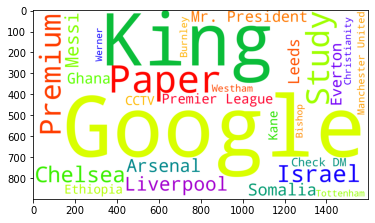

In [213]:
plt.imshow(wordcloud)

# Cleaning/Preprocessing Tweets for Analysis
- Data Cleaning is one of the common tasks in machine learning, particularly for data science
- Some NLP tasks for normalizing tweets
    - All text to same case
    - Remove hashtags, @mentions, duplicate hashtags, excessive white spaces, punctuation, stop words, URLs, RT, FAV
    - Perform stemming and lemmatization
    - Tokenization - Turning information into meaningless string of characters 


    

# tweet_preprocessor 
- Library and TextBlob Utility Functions 
- URL, emojis(smileys)
- Numbers

In [214]:
import preprocessor as p

- You can remove: 
    - OPT.MENTION @NASA
    - OPT.EMOJI
    - OPT.HASHTAG
    - OPT.URL
    - OPT.SMILEY

In [215]:
p.set_options(p.OPT.URL, p.OPT.RESERVED, p.OPT.SMILEY, p.OPT.NUMBER, p.OPT.HASHTAG)

In [216]:
tweet_text = 'RT Good morning? Make your orders with us on any covid19 kits. We provide affordable&certified http://kits.Call or whatsapp us on 0711855039. We do countrywide delivery&reduced prices on #bulk purchase.'

In [217]:
p.clean(tweet_text)

'Good morning? Make your orders with us on any covid19 kits. We provide affordable&certified or whatsapp us on . We do countrywide delivery&reduced prices on purchase.'

# Twitter Streaming API
- Streams randomly selected live tweets
- Maximum of 1% of the tweets per day from over 85000 tweets per second, 750 million tweets per day
- 1% of 750 million tweets = 7.5 million tweets a day

# StreamListener subclass
- A stream uses a persistent connection to push the tweets to the app
- Streaming rate varies heavily based on the search criteria
- StreamListener is a subclass of the Tweepy which notifies when new tweets (or other Twitter messages) arrives
- Each message results in a call to StreamListener method
- We need to override the methods that we need eg:
    - on_connect(self)
    - on_status(self, status) - called when a tweet arrives
    - on_limit(self, track) - called when a limit notice arrives
    - on_error(self, status_code) - error codes from Twitter
    - on_timeout(self) - Twitter server not responding
    - on_warning(self, notice) - disconnect warnings to indicate that the connection might be closed

In [218]:
import tweepy
from textblob import TextBlob

class TweetListener(tweepy.StreamListener):
    """Handles incoming Tweet stream."""
    
    def __init__(self, api, limit=10):
        """Create instance variables for tracking number of tweets."""
        self.tweet_count=0
        self.TWEET_LIMIT=limit
        super().__init__(api) # call to the superclass's init
        
    def on_connect(self):
        """Called when your connection attempt is successful, enabling 
        you to perform appropriate application tasks a that point"""
        print('Connection successful \n')
        
    def on_status(self, status):
        """Called when Twitter pushes a new tweet to you."""
        # get the tweet text
        try:
            tweet_text=status.extended_tweet.full_text
        except:
            tweet_text=status.text
        print(f' Screen name: {status.user.screen_name}:')
        print(f'    Language: {status.lang}')
        print(f'      Status: {tweet_text}')
        
        if status.lang != 'en':
            print(f' Translated: {TextBlob(tweet_text).translate()}')
            
        print()
        self.tweet_count +=1  # keep track of the tweets processed
        
    # if TWEET_LIMIT is reached, return False to terminate streaming
        return self.tweet_count <= self.TWEET_LIMIT


In [219]:
import keys

In [220]:
api = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)

In [221]:
auth.set_access_token(keys.access_token, keys.access_token_secret)

In [222]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# TweetListener Object Creation
- Used for initializing the api object
- 10 tweets will stream

In [223]:
tweet_listener = TweetListener(api)

In [224]:
# We create a Stream object to manage the connection to the Twitter stream

tweet_stream = tweepy.Stream(auth=api.auth, listener=tweet_listener)

In [225]:
tweet_stream.filter(track=['arsenal'])

Connection successful 

 Screen name: UcheOfili4:
    Language: en
      Status: RT @footballdaily: 🗣"Ozil has to play, don't worry about his wages or running around, if you ask Mourinho tomorrow he would rather Ozil not…

 Screen name: Gunner12True:
    Language: en
      Status: Ain’t a big fan of ozil but it’s a joke that he’s not playing he should play at least play in all the home games.
O… https://t.co/oGscf9GLYc

 Screen name: SpArKsMaN_SA:
    Language: en
      Status: RT @Iam_MBoss: Arsenal &amp; 0.5 🤣🤣🤣🤣😭😭😭😭

 Screen name: 10Simmer10:
    Language: en
      Status: @AFC_Carys @datguysadz What's next, evaluation of Arsenal v 12 year Olds.

 Screen name: Eliel_rz:
    Language: es
      Status: RT @Jovenesfutmx: ¡VICTORIA Y DOS ASISTENCIAS! 👊

Marcelo Flores(17) jugó los 90 minutos en la victoria del Arsenal sub-18 2-1 frente a su…
 Translated: RT @Jovenesfutmx: VICTORIA AND TWO ASSISTANTS! 👊

Marcelo Flores (17) played the 90 minutes in Arsenal's 2-1 victory against his ...



In [226]:
tweet_stream.filter(track=['AI'])

Connection successful 

 Screen name: CrumpetsGino:
    Language: fr
      Status: @ASExprime @Milady_Oscar @TributDuSujet Non, moi non plus... je le remets tel quel 😅
(Mais je n'ai pas non plus 37… https://t.co/rgFO7hhLLp
 Translated: @ASExprime @Milady_Oscar @TributDuSujet No, me neither ... I put it back as is 😅
(But I don't have 37 either… https://t.co/rgFO7hhLLp



In [227]:
tweet_stream.filter(track=['Ozil'])

Connection successful 

 Screen name: AhmedMahmood6:
    Language: en
      Status: RT @footballdaily: 🗣"Ozil has to play, don't worry about his wages or running around, if you ask Mourinho tomorrow he would rather Ozil not…



In [228]:
import requests

In [229]:
response = requests.get('https://www.bbc.com/')

In [230]:
response.content #gives html page

b'    <!DOCTYPE html>\n<html class="b-header--black--white b-pw-1280 b-reith-sans-font">\n\n    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n        <meta name="description" content="Breaking news, sport, TV, radio and a whole lot more.\n        The BBC informs, educates and entertains - wherever you are, whatever your age.">\n        <meta name="keywords" content="BBC, bbc.co.uk, bbc.com, Search, British Broadcasting Corporation, BBC iPlayer, BBCi">\n        <title>BBC - Homepage</title>\n\n        <script>\n            window.orb_fig_blocking = true;\n            window.bbcredirection = {geo: true};\n        </script>\n\n        <!-- WWHPv: 20201127-1201-aa50947fd69d781e60677b1680b344ea5bd4e542 -->\n        <!-- Webapp: WWHP international homepage -->\n        <meta property="fb:page_id" content="228735667216" />\n        <meta property="fb:admins" content="297814326937641" />\n        <meta property="fb:app_id" content="187214818032936" />\n  

In [231]:
from bs4 import BeautifulSoup

In [232]:
soup = BeautifulSoup(response.content, 'html5lib')

In [233]:
text = soup.get_text(strip=True)

In [234]:
text

'BBC - Homepagewindow.orb_fig_blocking = true;\n            window.bbcredirection = {geo: true};// nav-orbit-pollyfills\n    // Promise polyfill from https://github.com/bramstein/promis\n    (function(){\'use strict\';var f,g=[];function l(a){g.push(a);1==g.length&&f()}function m(){for(;g.length;)g[0](),g.shift()}f=function(){setTimeout(m)};function n(a){this.a=p;this.b=void 0;this.f=[];var b=this;try{a(function(a){q(b,a)},function(a){r(b,a)})}catch(c){r(b,c)}}var p=2;function t(a){return new n(function(b,c){c(a)})}function u(a){return new n(function(b){b(a)})}function q(a,b){if(a.a==p){if(b==a)throw new TypeError;var c=!1;try{var d=b&&b.then;if(null!=b&&"object"==typeof b&&"function"==typeof d){d.call(b,function(b){c||q(a,b);c=!0},function(b){c||r(a,b);c=!0});return}}catch(e){c||r(a,e);return}a.a=0;a.b=b;v(a)}} function r(a,b){if(a.a==p){if(b==a)throw new TypeError;a.a=1;a.b=b;v(a)}}function v(a){l(function(){if(a.a!=p)for(;a.f.length;){var b=a.f.shift(),c=b[0],d=b[1],e=b[2],b=b[3];tr

`ASSIGNMENT`
- Stream tweets for 5 sessions - run the stream code for 5 sessions, in a day, create a wordcloud using tweets you had, for each session
- nation, bbc, cnn, harvest data from news media houses websites - to see if it maps with what is current
- also draw a bar chart
 - what is trending currently for the sessions 

# Readability Assessment with Textatistic
- Vocabulary
- Sentence structure
- Sentence 
- Dale Chall, Flesch, Gunning fog

In [235]:
from pathlib import Path

In [236]:
text = Path('RomeoAndJuliet.txt').read_text()

In [237]:
from textatistic import Textatistic

In [238]:
readability = Textatistic(text)

In [239]:
%precision 4

'%.4f'

In [240]:
readability.dict()

{'char_count': 117014,
 'word_count': 26071,
 'sent_count': 3217,
 'sybl_count': 30167,
 'notdalechall_count': 5858,
 'polysyblword_count': 571,
 'flesch_score': 100.7178,
 'fleschkincaid_score': 1.2245,
 'gunningfog_score': 4.1177,
 'smog_score': 5.5359,
 'dalechall_score': 7.5864}

# Named Entity Recognition with spaCy
- NLP can determine the what a text is about
- It can be able to locate and categorize items eg date, time, quantities, places, people, things and more...
- We use the library spaCy which does more

In [241]:
import spacy

In [242]:
nlp = spacy.load('en_core_web_sm')

In [243]:
document = nlp('In 2020 we had corona, started in China in March' +
              'The economies of countries have suffered and also' +
              'individuals have suffered for the last 8 months')

In [244]:
for entity in document.ents:
    print(f'{entity.text}: {entity.label_}')

2020: DATE
China: GPE
MarchThe: ORG
the last 8 months: DATE


# Similarity Detection with spaCy
- 

In [245]:
from pathlib import Path

In [246]:
doc1 = nlp(Path('copiedtext.txt').read_text())

In [247]:
doc1

Wavelength Based Systems: The CPRI link in a single site is usually established by a dedicated fiber. However, it is desirable to multiplex CPRI links onto a single fiber link for sites with multiple antennas. In situation where there are few CPRI links connected to a RRH site, passive Coarse Wavelength Division Multiplexing (CWDM) can be deployed for the fronthaul transport. CWDM is a cost-effective technology based on optical technology and can be deployed in both access and metro networks. The challenge with CWDM technology is assignment of fixed wavelength, as this does not suit the purposes of network migration and operations. Also, the number of channels available using CWDM cannot satisfy complex networks which involves several RRHs connected to a central BBU pool.

In [248]:
doc2 = nlp(Path('originaltext.txt').read_text())

In [249]:
doc2

Wavelength Based Systems: The CPRI link in a single antenna site is usually established by a dedicated fiber but for sites with multiple antennas, their CPRI link is preferably multiplexed onto a single fiber. In scenarios with only a few CPRI links per RRH site, the fronthaul transport can be accomplished by using passive coarse wavelength division multiplexing (CWDM), a cost-efficient optical multiplexing technology for access and metro networks. However, the fixed wavelength assignment in commercial CWDM solutions renders it less attractive from network operations and migration perspective. Furthermore, in more complex configurations or in networks with many RRHs connected to a central BBU cluster, the channel numbers available from CWDM may

In [250]:
doc1.similarity(doc2)

C:\Users\HP\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """Entry point for launching an IPython kernel.


0.9579350072181474

In [251]:
# spaCy believes the documents are significantly similarity